In [9]:
from keras.layers import Conv2D, UpSampling2D, InputLayer, Conv2DTranspose
from keras.layers import Activation, Dense, Dropout, Flatten
from keras.layers.normalization import BatchNormalization
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray, xyz2lab
from skimage.io import imsave
import numpy as np
import os
import random
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
# Get images
image = img_to_array(load_img('data/01_002.jpg'))
image = np.array(image, dtype=float)

In [5]:
X = rgb2lab(1.0/255*image)[:,:,0]
Y = rgb2lab(1.0/255*image)[:,:,1:]
Y /= 128
X = X.reshape(1, 400, 400, 1)
Y = Y.reshape(1, 400, 400, 2)

In [6]:
# Building the neural network
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(8, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', strides=2))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [7]:
# Finish model
model.compile(optimizer='rmsprop',loss='mse')

In [8]:
model.fit(x=X, 
    y=Y,
    batch_size=1,
    epochs=1000)

Epoch 1/1000
1/1 [==============================] - 2s 2s/step - loss: 0.5389
Epoch 2/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.1340
Epoch 3/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.2480
Epoch 4/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0065
Epoch 5/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0060
Epoch 6/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0058
Epoch 7/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0057
Epoch 8/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0056
Epoch 9/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0055
Epoch 10/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0055
Epoch 11/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0053
Epoch 12/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0054
Epoch 13/1000
1/1 [====================

Epoch 103/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0027
Epoch 104/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0022
Epoch 105/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0019
Epoch 106/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0018
Epoch 107/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0019
Epoch 108/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0021
Epoch 109/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0031
Epoch 110/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0023
Epoch 111/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0021
Epoch 112/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0022
Epoch 113/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0024
Epoch 114/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0026
Epoch 115/1000
1

Epoch 203/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0040
Epoch 204/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0050
Epoch 205/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0037
Epoch 206/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0026
Epoch 207/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0018
Epoch 208/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0013
Epoch 209/1000
1/1 [==============================] - 0s 17ms/step - loss: 0.0011
Epoch 210/1000
1/1 [==============================] - 0s 16ms/step - loss: 9.9067e-04
Epoch 211/1000
1/1 [==============================] - 0s 16ms/step - loss: 9.4372e-04
Epoch 212/1000
1/1 [==============================] - 0s 14ms/step - loss: 9.1995e-04
Epoch 213/1000
1/1 [==============================] - 0s 16ms/step - loss: 9.2257e-04
Epoch 214/1000
1/1 [==============================] - 0s 14ms/step - loss: 9.8005e

Epoch 301/1000
1/1 [==============================] - 0s 14ms/step - loss: 8.7382e-04
Epoch 302/1000
1/1 [==============================] - 0s 15ms/step - loss: 7.8886e-04
Epoch 303/1000
1/1 [==============================] - 0s 15ms/step - loss: 7.5738e-04
Epoch 304/1000
1/1 [==============================] - 0s 18ms/step - loss: 7.4035e-04
Epoch 305/1000
1/1 [==============================] - 0s 18ms/step - loss: 0.0013
Epoch 306/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0026
Epoch 307/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0027
Epoch 308/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0015
Epoch 309/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0013
Epoch 310/1000
1/1 [==============================] - 0s 15ms/step - loss: 9.6524e-04
Epoch 311/1000
1/1 [==============================] - 0s 15ms/step - loss: 7.4318e-04
Epoch 312/1000
1/1 [==============================] - 0s 16ms/step - loss:

Epoch 398/1000
1/1 [==============================] - 0s 15ms/step - loss: 9.9751e-04
Epoch 399/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0011
Epoch 400/1000
1/1 [==============================] - 0s 17ms/step - loss: 9.0813e-04
Epoch 401/1000
1/1 [==============================] - 0s 15ms/step - loss: 7.1351e-04
Epoch 402/1000
1/1 [==============================] - 0s 16ms/step - loss: 6.0960e-04
Epoch 403/1000
1/1 [==============================] - 0s 15ms/step - loss: 5.8323e-04
Epoch 404/1000
1/1 [==============================] - 0s 14ms/step - loss: 5.7551e-04
Epoch 405/1000
1/1 [==============================] - 0s 16ms/step - loss: 5.8761e-04
Epoch 406/1000
1/1 [==============================] - 0s 16ms/step - loss: 6.1148e-04
Epoch 407/1000
1/1 [==============================] - 0s 19ms/step - loss: 7.0704e-04
Epoch 408/1000
1/1 [==============================] - 0s 15ms/step - loss: 7.2289e-04
Epoch 409/1000
1/1 [==============================] - 0s 1

Epoch 494/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0017
Epoch 495/1000
1/1 [==============================] - 0s 16ms/step - loss: 9.5798e-04
Epoch 496/1000
1/1 [==============================] - 0s 15ms/step - loss: 6.8457e-04
Epoch 497/1000
1/1 [==============================] - 0s 14ms/step - loss: 5.8278e-04
Epoch 498/1000
1/1 [==============================] - 0s 15ms/step - loss: 5.3250e-04
Epoch 499/1000
1/1 [==============================] - 0s 16ms/step - loss: 5.0681e-04
Epoch 500/1000
1/1 [==============================] - 0s 15ms/step - loss: 5.0827e-04
Epoch 501/1000
1/1 [==============================] - 0s 16ms/step - loss: 5.2304e-04
Epoch 502/1000
1/1 [==============================] - 0s 15ms/step - loss: 5.4678e-04
Epoch 503/1000
1/1 [==============================] - 0s 13ms/step - loss: 5.9852e-04
Epoch 504/1000
1/1 [==============================] - 0s 15ms/step - loss: 6.4752e-04
Epoch 505/1000
1/1 [==============================] - 0s 1

Epoch 590/1000
1/1 [==============================] - 0s 14ms/step - loss: 5.3802e-04
Epoch 591/1000
1/1 [==============================] - 0s 16ms/step - loss: 4.8713e-04
Epoch 592/1000
1/1 [==============================] - 0s 16ms/step - loss: 5.0608e-04
Epoch 593/1000
1/1 [==============================] - 0s 16ms/step - loss: 5.6493e-04
Epoch 594/1000
1/1 [==============================] - 0s 16ms/step - loss: 7.4586e-04
Epoch 595/1000
1/1 [==============================] - 0s 14ms/step - loss: 8.1236e-04
Epoch 596/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0013
Epoch 597/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0030
Epoch 598/1000
1/1 [==============================] - 0s 14ms/step - loss: 0.0021
Epoch 599/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0022
Epoch 600/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0015
Epoch 601/1000
1/1 [==============================] - 0s 16ms/step - loss:

Epoch 686/1000
1/1 [==============================] - 0s 17ms/step - loss: 4.5999e-04
Epoch 687/1000
1/1 [==============================] - 0s 15ms/step - loss: 4.2381e-04
Epoch 688/1000
1/1 [==============================] - 0s 15ms/step - loss: 3.8577e-04
Epoch 689/1000
1/1 [==============================] - 0s 17ms/step - loss: 4.0257e-04
Epoch 690/1000
1/1 [==============================] - 0s 14ms/step - loss: 4.2225e-04
Epoch 691/1000
1/1 [==============================] - 0s 15ms/step - loss: 5.1010e-04
Epoch 692/1000
1/1 [==============================] - 0s 15ms/step - loss: 4.6170e-04
Epoch 693/1000
1/1 [==============================] - 0s 15ms/step - loss: 5.4540e-04
Epoch 694/1000
1/1 [==============================] - 0s 15ms/step - loss: 5.8270e-04
Epoch 695/1000
1/1 [==============================] - 0s 13ms/step - loss: 8.6472e-04
Epoch 696/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0015
Epoch 697/1000
1/1 [==============================] - 0s 1

Epoch 782/1000
1/1 [==============================] - 0s 14ms/step - loss: 3.2284e-04
Epoch 783/1000
1/1 [==============================] - 0s 15ms/step - loss: 3.3546e-04
Epoch 784/1000
1/1 [==============================] - 0s 17ms/step - loss: 3.5724e-04
Epoch 785/1000
1/1 [==============================] - 0s 17ms/step - loss: 4.2144e-04
Epoch 786/1000
1/1 [==============================] - 0s 15ms/step - loss: 4.4274e-04
Epoch 787/1000
1/1 [==============================] - 0s 19ms/step - loss: 4.6637e-04
Epoch 788/1000
1/1 [==============================] - 0s 16ms/step - loss: 5.0115e-04
Epoch 789/1000
1/1 [==============================] - 0s 17ms/step - loss: 4.4515e-04
Epoch 790/1000
1/1 [==============================] - 0s 21ms/step - loss: 4.3106e-04
Epoch 791/1000
1/1 [==============================] - 0s 17ms/step - loss: 3.4365e-04
Epoch 792/1000
1/1 [==============================] - 0s 16ms/step - loss: 3.9871e-04
Epoch 793/1000
1/1 [==============================] - 

Epoch 878/1000
1/1 [==============================] - 0s 17ms/step - loss: 5.8435e-04
Epoch 879/1000
1/1 [==============================] - 0s 15ms/step - loss: 7.3961e-04
Epoch 880/1000
1/1 [==============================] - 0s 14ms/step - loss: 5.4853e-04
Epoch 881/1000
1/1 [==============================] - 0s 17ms/step - loss: 5.3637e-04
Epoch 882/1000
1/1 [==============================] - 0s 15ms/step - loss: 5.1221e-04
Epoch 883/1000
1/1 [==============================] - 0s 15ms/step - loss: 5.0372e-04
Epoch 884/1000
1/1 [==============================] - 0s 16ms/step - loss: 5.4817e-04
Epoch 885/1000
1/1 [==============================] - 0s 17ms/step - loss: 7.3135e-04
Epoch 886/1000
1/1 [==============================] - 0s 16ms/step - loss: 9.5582e-04
Epoch 887/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0015
Epoch 888/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0031
Epoch 889/1000
1/1 [==============================] - 0s 16ms/

Epoch 974/1000
1/1 [==============================] - 0s 17ms/step - loss: 6.3348e-04
Epoch 975/1000
1/1 [==============================] - 0s 17ms/step - loss: 4.6686e-04
Epoch 976/1000
1/1 [==============================] - 0s 16ms/step - loss: 4.5582e-04
Epoch 977/1000
1/1 [==============================] - 0s 16ms/step - loss: 4.8384e-04
Epoch 978/1000
1/1 [==============================] - 0s 14ms/step - loss: 7.9147e-04
Epoch 979/1000
1/1 [==============================] - 0s 14ms/step - loss: 7.1414e-04
Epoch 980/1000
1/1 [==============================] - 0s 15ms/step - loss: 5.2099e-04
Epoch 981/1000
1/1 [==============================] - 0s 15ms/step - loss: 5.0832e-04
Epoch 982/1000
1/1 [==============================] - 0s 15ms/step - loss: 7.9306e-04
Epoch 983/1000
1/1 [==============================] - 0s 15ms/step - loss: 0.0012
Epoch 984/1000
1/1 [==============================] - 0s 16ms/step - loss: 0.0010
Epoch 985/1000
1/1 [==============================] - 0s 17ms/

1/1 [==============================] - 0s 20ms/step
0.00046258969814516604


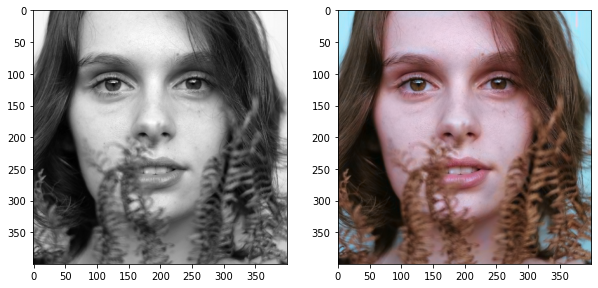

In [12]:
print(model.evaluate(X, Y, batch_size=1))
output = model.predict(X)
output *= 128
# Output colorizations
cur = np.zeros((400, 400, 3))
cur[:,:,0] = X[0][:,:,0]
cur[:,:,1:] = output[0]
plt.figure(figsize=(10,5), facecolor='w')
plt.subplot(1,2,1)
plt.imshow(rgb2gray(lab2rgb(cur)), cmap='gray')
plt.subplot(1,2,2)
plt.imshow(lab2rgb(cur))